<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.11 Uncertainty Intervals
Many times, we get a number of ensembles of the data. And we want to see the behaviour of these
ensemble. Let us first begin by generating ensemble, and then plotting them. In this example, first
we are generating a signal with sin behaviour. Then, we are using *vstack* to stack the data i.e. to
make two dimensional array using many one dimensional arrays. After this, we mix some noise in
the data so that ensemble looks slightly different. We are transposing the data using *T* attributes for
plotting, otherwise it will plot ensemble on *x−axis* instead of time.

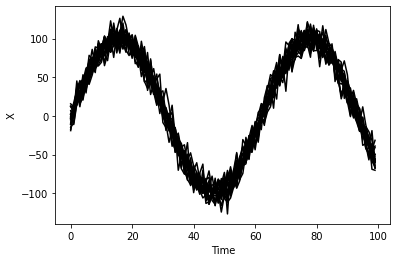

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# generate some data
x = 100*np.sin(np.linspace(0,10,100))
X = np.vstack([x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x])
e = 10*np.random.randn(20,100)

X_err = X+e

plt.plot(X_err.T, 'k')
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

Above figure shows the plot of these ensembles. We see that all the ensemble are behaving similar to
each one. But we can not infer anything more on the behaviour of ensemble using this plot. A better
way to visualize ensemble is by using the various uncertainty intervals along with the mean. We can
compute the uncertainty interval at various percentile using the st.scoreatpercentile function.


We are computing 10th, 50th, and 90th percentile. 50th percentile is the median. We are plotting
median than the mean, because if there are some outliers in the data, median provided better insight
into the behaviour of ensemble. Fig. 5.20 shows the median, 10th, and 90th of ensemble. Using this
plot, we can make out that the spreads of the ensemble is not same everywhere; it is relatively more
in the peak and valley and less elsewhere.

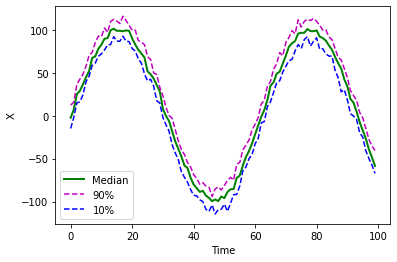

In [11]:
ll = st.scoreatpercentile(X_err, 10, axis=0) # 10th percentile
ml = st.scoreatpercentile(X_err, 50, axis=0) # 50th percentile
ul = st.scoreatpercentile(X_err, 90, axis=0) # 90th percentile

plt.plot(ml, 'g', lw=2, label='Median')
plt.plot(ul, '--m', label='90%')
plt.plot(ll, '--b', label='10%')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend(loc='best')
plt.show()

The uncertainty intervals could be plotted by shaded regions. The *plt.fill_between* provides the
option of filling color in between two array, and can be used to make a shaded regions.

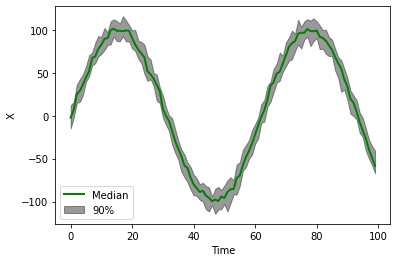

In [12]:
plt.plot(ml, 'g', lw=2, label='Median')
plt.fill_between(range(100), ul, ll, color='k', alpha=0.4, label='90%')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend(loc='best')
plt.show()